In [1]:
options(warn=-1)

In [2]:
install.packages("plyr")

Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmpg7HV8c\downloaded_packages


In [3]:
install.packages("ggplot2")
install.packages("cluster")

Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmpg7HV8c\downloaded_packages


Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'cluster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmpg7HV8c\downloaded_packages


In [4]:
install.packages("lattice")
install.packages("grid")
install.packages("gridExtra")

Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'lattice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmpg7HV8c\downloaded_packages


Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

Installing package into 'C:/Users/User/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\Rtmpg7HV8c\downloaded_packages


In [5]:
library(plyr)
library(ggplot2)
library(cluster)
library(lattice)
library(grid)
library(gridExtra)

In [6]:
grade_input=as.data.frame(read.csv("F:/GitHub/Practical_BscIT_MscIT_Ninad/MscIT/Semester 2/BigDataAnalytics/Dataset/grades_km_input.csv"))
kmdata_orig=as.matrix(grade_input[, c ("Student","English","Math","Science")])
kmdata=kmdata_orig[,2:4]
kmdata[1:10,]

English,Math,Science
99,96,97
99,96,97
98,97,97
95,100,95
95,96,96
96,97,96
100,96,97
95,98,98
98,96,96
99,99,95


In [7]:
# the k-means algorithm is used to identify clusters for k = 1, 2, .. . , 15. For each value of k, the WSS is calculated.
wss=numeric(15)

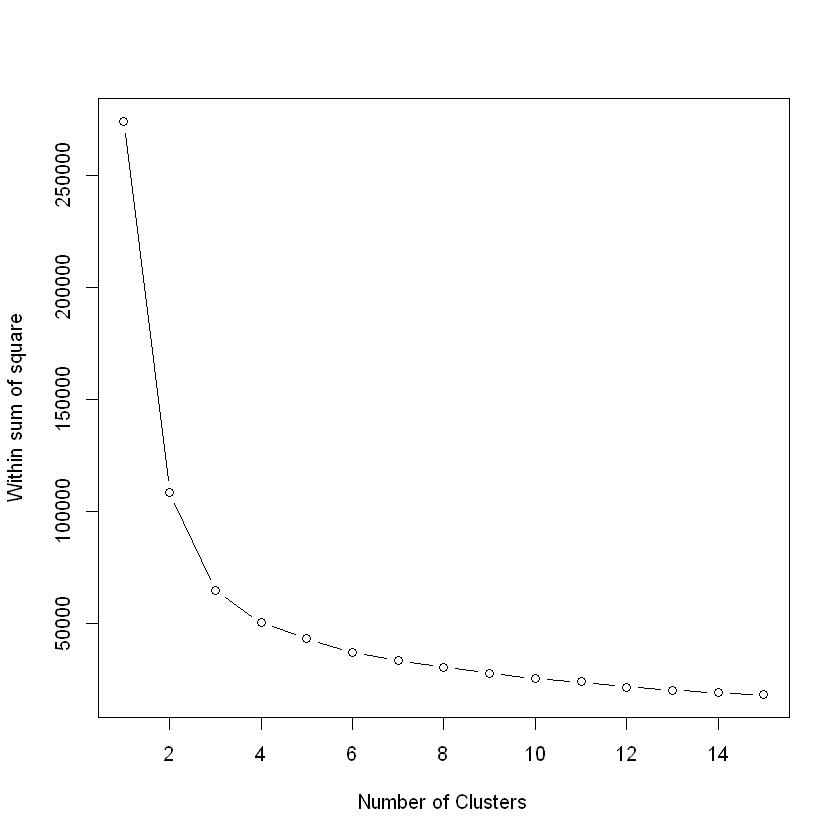

In [8]:
# the option n start=25 specifies that the k-means algorithm will be repeated 25 times, each starting with k random initial centroids
for(k in 1:15)
    wss[k]=sum(kmeans(kmdata,centers=k,nstart=25)$withinss)
plot(1:15,wss,type="b",xlab="Number of Clusters",ylab="Within sum of square")

In [9]:
#As can be seen, the WSS is greatly reduced when k increases from one to two. Another substantial reduction in WSS occurs at k = 3. However, the improvement in WSS is fairly linear fork > 3.
km = kmeans(kmdata,3,nstart=25)
km

K-means clustering with 3 clusters of sizes 218, 158, 244

Cluster means:
   English     Math  Science
1 73.22018 64.62844 65.84862
2 97.21519 93.37342 94.86076
3 85.84426 79.68033 81.50820

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 2 3 3 2 3 3 3
[186] 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[260] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[297] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[334] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [10]:
c( wss[3] , sum(km$withinss))

[1] 64483.06 64483.06

In [11]:
df=as.data.frame(kmdata_orig[,2:4])
df$cluster=factor(km$cluster)
centers=as.data.frame(km$centers)

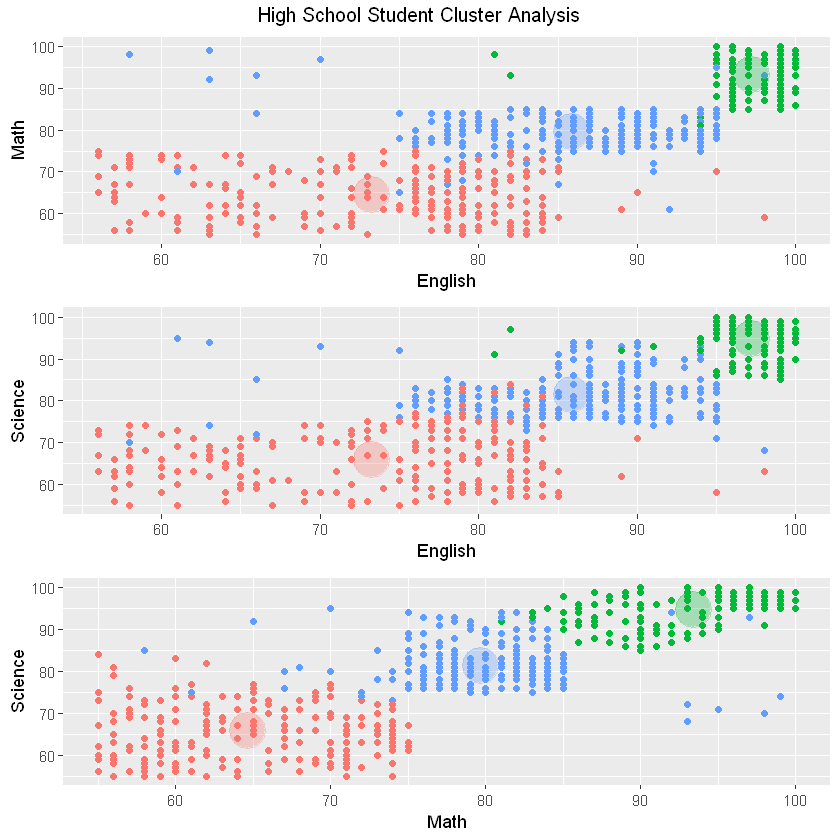

In [12]:
g1=ggplot(data=df, aes(x=English, y=Math, color=cluster )) + geom_point() + theme(legend.position="right") + geom_point(data=centers,aes(x=English,y=Math, color=as.factor(c(1,2,3))),size=10, alpha=.3, show.legend =FALSE)

g2=ggplot(data=df, aes(x=English, y=Science, color=cluster )) + geom_point () +geom_point(data=centers,aes(x=English,y=Science, color=as.factor(c(1,2,3))),size=10, alpha=.3, show.legend=FALSE)

g3 = ggplot(data=df, aes(x=Math, y=Science, color=cluster )) + geom_point () + geom_point(data=centers,aes(x=Math,y=Science, color=as.factor(c(1,2,3))),size=10, alpha=.3, show.legend=FALSE)
tmp=ggplot_gtable(ggplot_build(g1))

grid.arrange(arrangeGrob(g1 + theme(legend.position="none"),g2 + theme(legend.position="none"),g3 + theme(legend.position="none"),top ="High School Student Cluster Analysis" ,ncol=1))